### Import

In [1]:
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib import cm
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.stats import multivariate_normal as mnorm
from mpl_toolkits import mplot3d
from matplotlib import font_manager as fm, rcParams

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Colormap

In [3]:
cmap = plt.get_cmap('plasma_r')
cmap = np.array(cmap.colors)

### Create 5 Points

In [4]:
P = np.array([2,2])
Q = np.array([4,-4])
R = np.array([-3,3])
S = np.array([-2,2])
T = np.array([-1,-2])
U = np.array([-1,2])
L = ['P','Q','R','S','T','U']
V = np.vstack((P,Q,R,S,T,U,[0,0]))

### Euclidean Distance

In [5]:
def euclidean_distance(P,Q):
    
    return np.sqrt((P[0] - Q[0])**2 + (P[1] - Q[1])**2)

### Manhattan Distance

In [6]:
def manhattan_distance(P,Q):
    
    return np.abs(P[0] - Q[0]) + P[1] - Q[1]

### Cosine Distance

In [7]:
def cosine_distance(P,Q):
    
    return 1 - (np.sum(P * Q) / (np.sqrt(np.sum(P**2)) * np.sqrt(np.sum(Q**2))))

### Cosine Similarity

In [8]:
def cosine_similarity(P,Q):
    
    return (np.sum(P * Q) / (np.sqrt(np.sum(P**2)) * np.sqrt(np.sum(Q**2))))

### Plot Vectors

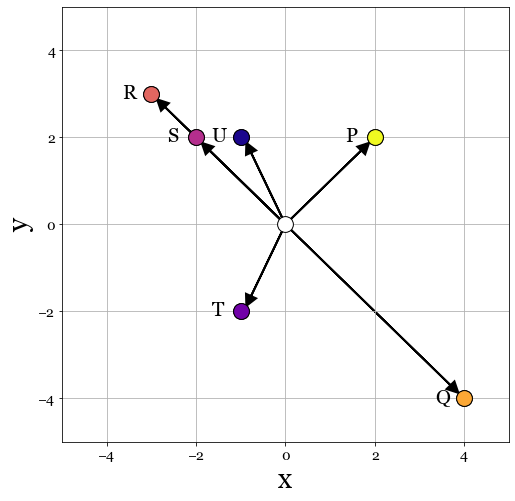

In [9]:
plt.figure(figsize=(8,8))
for i in range(V.shape[0]-1):
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    signx = V[i,0] / np.abs(V[i,0])
    signy = V[i,1] / np.abs(V[i,1])
    plt.text(V[i,0]-0.65,V[i,1]-0.1,L[i],fontsize=20,**csfont)
    plt.arrow(0,0,V[i,0]-(signx*0.125),V[i,1]-(signy*0.125),
              length_includes_head = True,head_width = 0.25,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=2)
plt.scatter(0,0,color=[1,1,1],s=250,edgecolor='k',zorder=1000)
plt.xlabel('x',fontsize=28,**csfont);
plt.ylabel('y',fontsize=28,**csfont);
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.axis((-5,5,-5,5))
plt.grid()

### Plot Vectors with Euclidean Distance

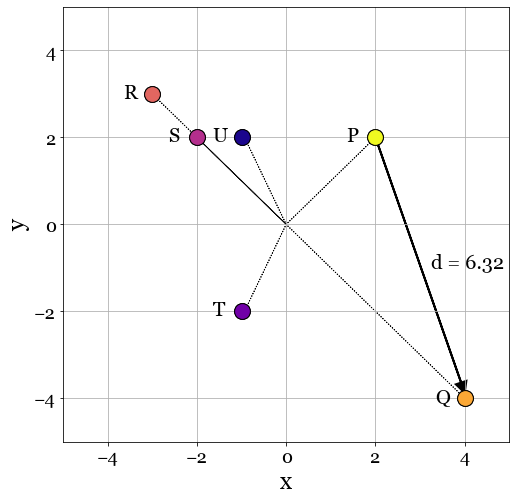

In [18]:
D = euclidean_distance(P,Q)
plt.figure(figsize=(8,8))
for i in range(V.shape[0]-1):
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    signx = V[i,0] / np.abs(V[i,0])
    signy = V[i,1] / np.abs(V[i,1])
    plt.text(V[i,0]-0.65,V[i,1]-0.1,L[i],fontsize=20,**csfont)
    plt.arrow(0,0,V[i,0]-(signx*0.125),V[i,1]-(signy*0.125),
              length_includes_head = True,head_width = 0.0,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=1,linestyle=':')
plt.xlabel('x',fontsize=24,**csfont);
plt.ylabel('y',fontsize=24,**csfont);
plt.xticks(fontsize=18,**csfont);
plt.yticks(fontsize=18,**csfont);
plt.text(3.25,-1,'d = ' + str(np.round(D,2)),fontsize=20,**csfont)
plt.arrow(P[0],P[1],Q[0]-P[0],Q[1]-P[1]+0.125,
              length_includes_head = True,head_width = 0.25,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=2)
plt.axis((-5,5,-5,5))
plt.grid()
plt.savefig('../../assets/figures/012/012_distance_euclidean.png',dpi=300,bbox_inches="tight");

### Plot Vectors with Manhattan Distance

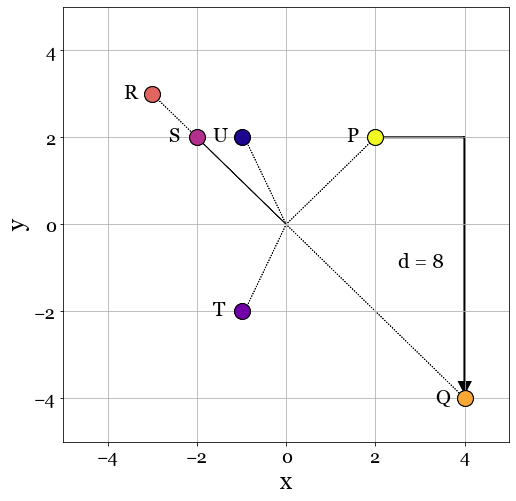

In [17]:
D = manhattan_distance(P,Q)
plt.figure(figsize=(8,8))
for i in range(V.shape[0]-1):
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    signx = V[i,0] / np.abs(V[i,0])
    signy = V[i,1] / np.abs(V[i,1])
    plt.text(V[i,0]-0.65,V[i,1]-0.1,L[i],fontsize=20,**csfont)
    plt.arrow(0,0,V[i,0]-(signx*0.125),V[i,1]-(signy*0.125),
              length_includes_head = True,head_width = 0.0,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=1,linestyle=':')
plt.xlabel('x',fontsize=24,**csfont);
plt.ylabel('y',fontsize=24,**csfont);
plt.xticks(fontsize=18,**csfont);
plt.yticks(fontsize=18,**csfont);
plt.text(2.5,-1,'d = ' + str(np.round(D,2)),fontsize=20,**csfont)
plt.arrow(P[0],P[1],Q[0]-P[0],0,
              length_includes_head = True,head_width = 0.025,head_length = 0.025,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=1.5)
plt.arrow(Q[0],P[0],0,Q[1]-P[1]+0.125,
              length_includes_head = True,head_width = 0.25,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=2)
plt.axis((-5,5,-5,5))
plt.grid()
plt.savefig('../../assets/figures/012/012_distance_manhattan.png',dpi=300,bbox_inches="tight");

### Plot Cosine Distance

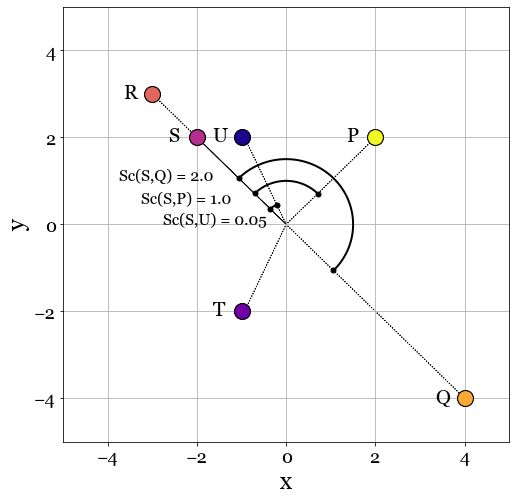

In [16]:
ScosSU = cosine_similarity(S,U)
ScosSP = cosine_similarity(S,P)
ScosSQ = cosine_similarity(S,Q)
DcosSU = 1 - ScosSU
DcosSP = 1 - ScosSP
DcosSQ = 1 - ScosSQ
angleSU = np.round(np.arccos(ScosSU) / np.pi * 180,2)
angleSP = np.round(np.arccos(ScosSP) / np.pi * 180,2)
angleSQ = np.round(np.arccos(ScosSQ) / np.pi * 180,2)

xval1 = np.cos(np.linspace(0,2*np.pi,361)[:-1])[::-1]
yval1 = np.sin(np.linspace(0,2*np.pi,361)[:-1])[::-1]
xval2 = np.cos(np.linspace(0,2*np.pi,361)[:-1])
yval2 = np.sin(np.linspace(0,2*np.pi,361)[:-1])
plt.figure(figsize=(8,8))
for i in range(V.shape[0]-1):
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    plt.scatter(V[i,0],V[i,1],color=cmap[i*50,:],s=250,edgecolor='k',zorder=1000)
    signx = V[i,0] / np.abs(V[i,0])
    signy = V[i,1] / np.abs(V[i,1])
    plt.text(V[i,0]-0.65,V[i,1]-0.1,L[i],fontsize=20,**csfont)
    plt.arrow(0,0,V[i,0]-(signx*0.125),V[i,1]-(signy*0.125),
              length_includes_head = True,head_width = 0.0,head_length = 0.25,
              shape = 'full',head_starts_at_zero = False,
              facecolor = 'k',edgecolor = 'k',linewidth=1,linestyle=':')

plt.xlabel('x',fontsize=24,**csfont);
plt.ylabel('y',fontsize=24,**csfont);
plt.xticks(fontsize=18,**csfont);
plt.yticks(fontsize=18,**csfont);
plt.scatter(xval1[225]*1.0,yval1[225]*1.0,c='k',s=25)
plt.scatter(-xval2[-45]*1.5,-yval2[-45]*1.5,c='k',s=25)
plt.scatter(-xval2[-45]*0.5,-yval2[-45]*0.5,c='k',s=25)
plt.scatter(xval1[-45]*1.0,yval1[-45]*1.0,c='k',s=25)
plt.scatter(-xval2[135]*1.5,-yval2[135]*1.5,c='k',s=25)
plt.scatter(-xval2[295]*0.5,-yval2[295]*0.5,c='k',s=25)
plt.plot(xval1[225:-45]*1.0,yval1[225:-45]*1.0,'k',linewidth=2)
plt.plot(-xval2[135:-45]*1.5,-yval2[135:-45]*1.5,'k',linewidth=2)
plt.plot(-xval2[295:-45]*0.5,-yval2[295:-45]*0.5,'k',linewidth=2)
plt.text(-3.75,1.0,'Sc(S,Q) = ' + str(np.round(DcosSQ,2)),fontsize=16,**csfont)
plt.text(-3.25,0.5,'Sc(S,P) = ' + str(np.round(DcosSP,2)),fontsize=16,**csfont)
plt.text(-2.75,0.0,'Sc(S,U) = ' + str(np.round(DcosSU,2)),fontsize=16,**csfont)
plt.axis((-5,5,-5,5))
plt.grid()
plt.savefig('../../assets/figures/012/012_distance_cosine.png',dpi=300,bbox_inches="tight");